# Laboratory session 2
***

**Author:** Rinaldi Luca 

### Exercise 1
***

In [1]:
x  <- c(15.58,15.9,16,16.1,16.2)
p1 <- c(0.15,0.21,0.35,0.15,0.14)
p2 <- c(0.14,0.05,0.64,0.08,0.09)

cat('E_p1[x] =', sum(p1*x), '\t\tVar_p1 =', sum(p1*x^2)-sum(p1*x)^2)
cat('\nE_p2[x] =', sum(p2*x), '\t\tVar_p2 =', sum(p2*x^2)-sum(p2*x)^2)

E_p1[x] = 15.959 		Var_p1 = 0.033979
E_p2[x] = 15.9622 		Var_p2 = 0.02816716

### Exercise 2
***
#### 2.A)

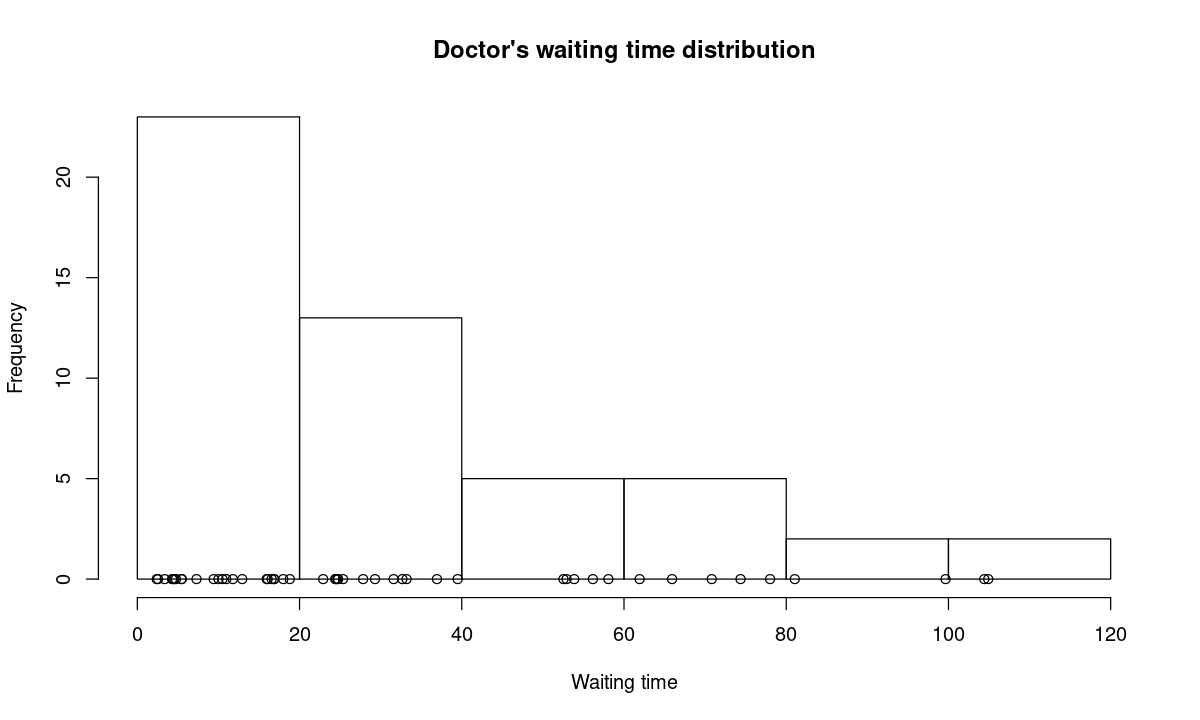

In [2]:
lambda <- 1/30

doc_time <- rexp(1:50, lambda)

options(repr.plot.width=10, repr.plot.height=6)
hist(doc_time,5, xlab='Waiting time', main = 'Doctor\'s waiting time distribution')
points(doc_time, rep(0,50))

#### 2.B)

In [3]:
cat('The probability that a person will wait for less than 10 minute is:',pexp(10,lambda))

The probability that a person will wait for less than 10 minute is: 0.2834687

#### 2.C)

In [4]:
avg_s <- mean(doc_time)                                                         # statistic average from data
avg_t <- 1/lambda                                                               # theoretical average
avg_c <- integrate(function(x){x*dexp(x,lambda)}, lower = 0, upper = Inf)$value # pdf integration average

cat('Simulated data\'s average:\t',avg_s)
cat('\nTheoretical average:\t\t', avg_t)
cat('\nPdf manipulation average:\t', avg_c)

Simulated data's average:	 32.43038
Theoretical average:		 30
Pdf manipulation average:	 30

#### 2.D)


In [5]:
cat('The probability that a person will wait for more than one hour is:',pexp(60,lambda,lower.tail = FALSE))

The probability that a person will wait for more than one hour is: 0.1353353

### Exercise 3
***

Probability that occur at least one typo on a specific page: 0.2834687

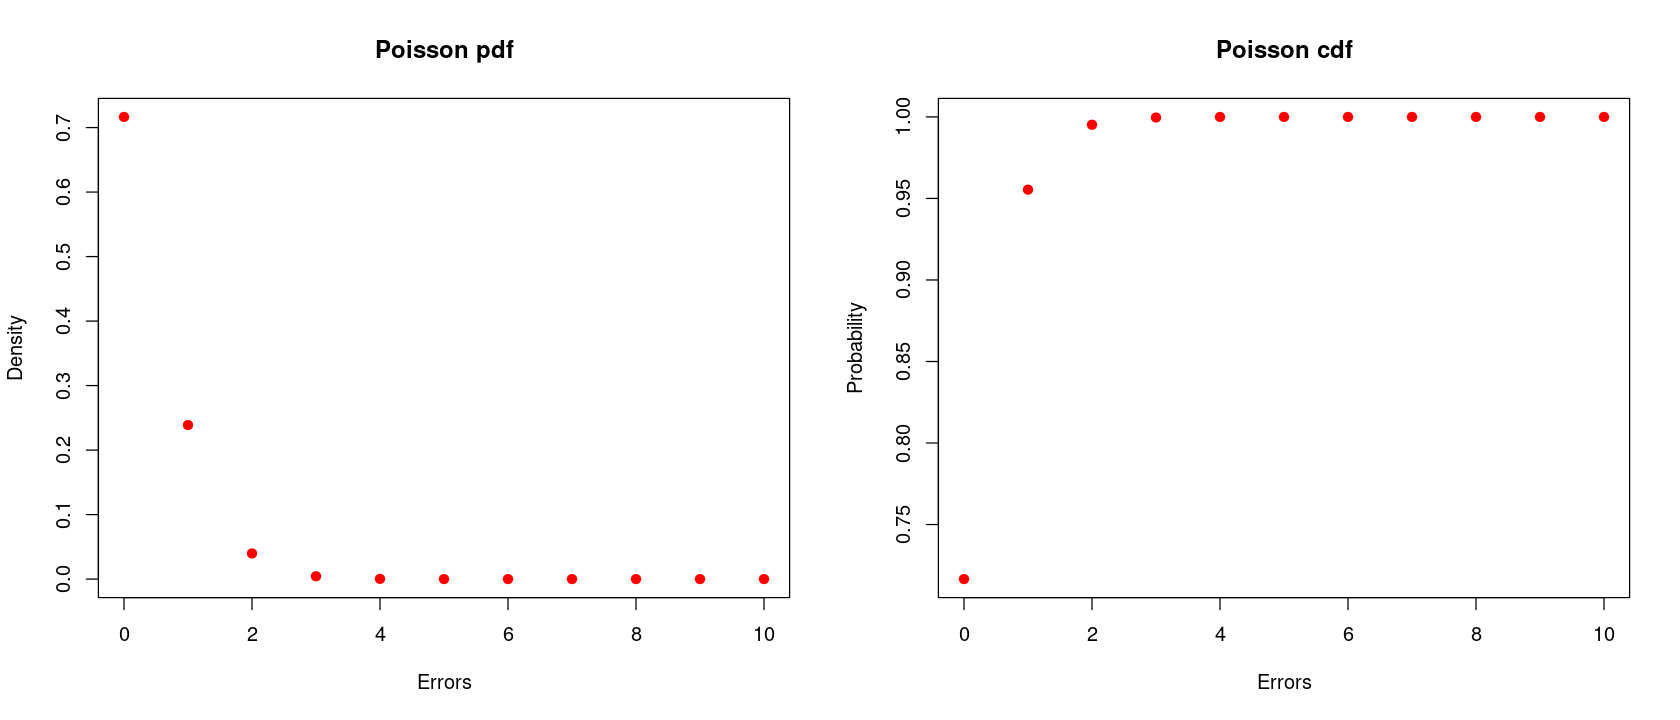

In [6]:
lambda <- 1/3
errors <- c(0:10)
pdf <- dpois(errors,lambda)
cdf <- ppois(errors,lambda)

par(mfrow = c(1,2))
options(repr.plot.width=14, repr.plot.height=6)
plot(errors,pdf, main='Poisson pdf', xlab='Errors', ylab='Density',col='red',pch=19)

plot(errors,cdf, main='Poisson cdf', xlab='Errors', ylab='Probability',col='red',pch=19)

cat('Probability that occur at least one typo on a specific page:',1-pdf[1])  # = 1-cdf[1]

### Exercise 4

In [7]:
# At least 10 draw needed => first 9 draw are certainly not ace 
prob <- 4/52
no_ace <- 9
cat('The probability that at least 10 draw are needed is:',(1-prob)^no_ace)
# alternatively could have been evaluated with the cdf of nbinom as:
# pnbinom(8,1,4/52, lower.tail = FALSE)

The probability that at least 10 draw are needed is: 0.4865652

### Exercise 5
***
<center>
$ f(X)= \cases {c(t-1)(2-t) \;\;\; 1<t<2 \\
                0   \hspace{3cm} otherwise}$
</center>

#### 5.a)

In [8]:
dTOLC <- Vectorize(function(t){
     x <- ifelse(t>1 & t<2,c*(t-1)*(2-t),0)
     return(x)
     })
     
c = 1
c <- 1/integrate(dTOLC,1,2)$value
cat('The constant c =',c)

The constant c = 6

#### 5.b)

Loading required package: KernSmooth

KernSmooth 2.23 loaded
Copyright M. P. Wand 1997-2009



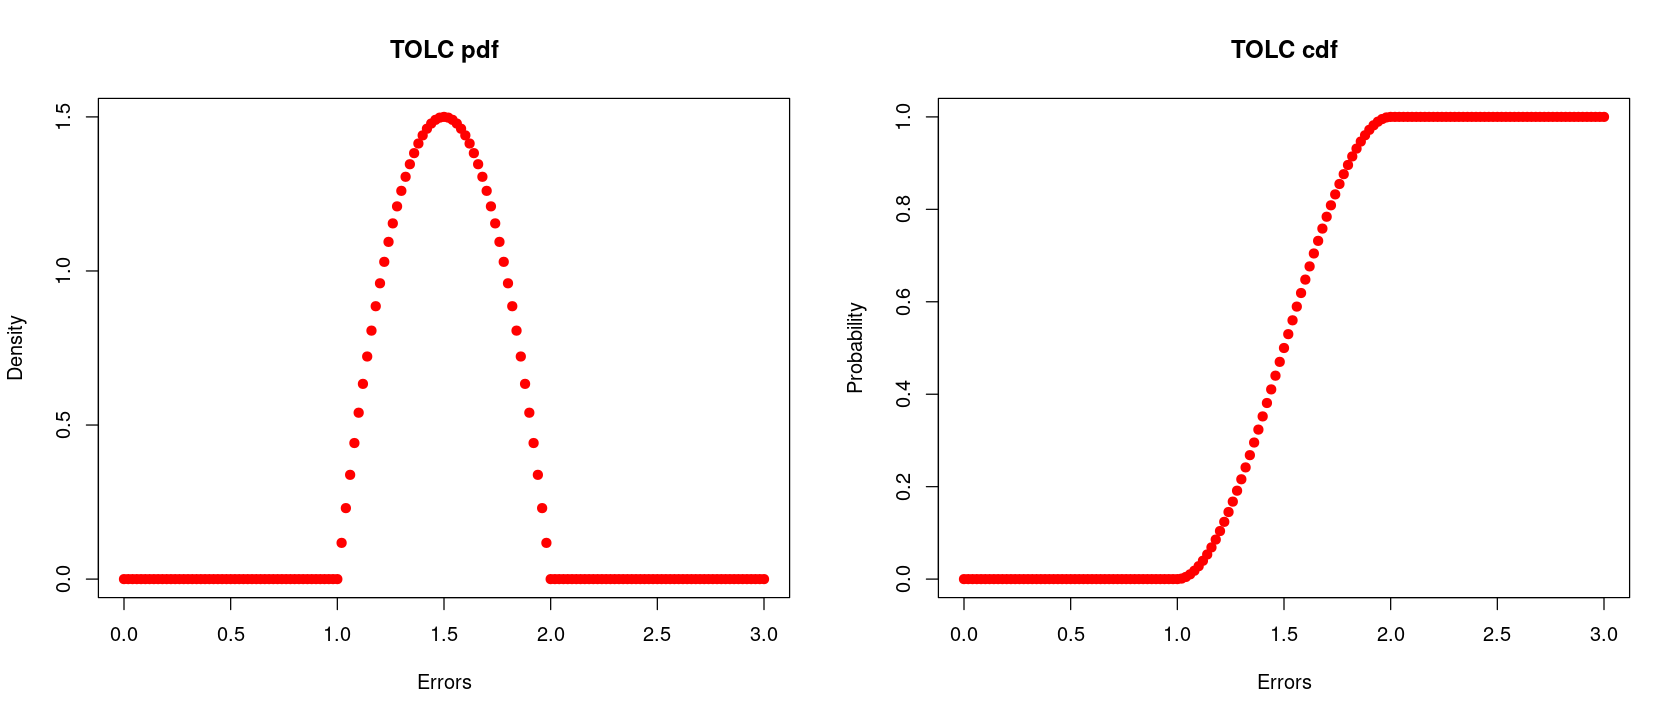

In [9]:
library(GoFKernel)
pTOLC <- Vectorize(function(t){ if (t<=1) {return(0)}
                      else if (t>=2) {return(1)}
                      else { return(c*(3*(t^2)/2 -(t^3)/3 -2*t) + 5)}
                    })

qTOLC <- Vectorize(function(p){inverse(pTOLC, lower=1, upper=2)(p)})

rTOLC <- function(n){ p_vec <- runif(n)
                      x_vec <- qTOLC(p_vec)
                      return(x_vec)}

x <- seq(0,3,0.02)
par(mfrow = c(1,2))
options(repr.plot.width=14, repr.plot.height=6)
plot(x,dTOLC(x), main='TOLC pdf', xlab='Errors', ylab='Density',col='red',pch=19)

plot(x,pTOLC(x), main='TOLC cdf', xlab='Errors', ylab='Probability',col='red',pch=19)

#### 5.c)

In [10]:
cat('The probability that a student will finish the test in more than 75 min is:\t\t',1-pTOLC(75/60))
cat('\nThe probability that a student will finish the test in a time between 90 and 120 min:\t',
    pTOLC(120/60)-pTOLC(90/60))

The probability that a student will finish the test in more than 75 min is:		 0.84375
The probability that a student will finish the test in a time between 90 and 120 min:	 0.5

### Exercise 6
***

<center>
$ f(X)= \cases {2/{x^2} \hspace{1.4cm} 1<t<2 \\
                0   \hspace{2cm} otherwise}$
</center>

#### 6.a)

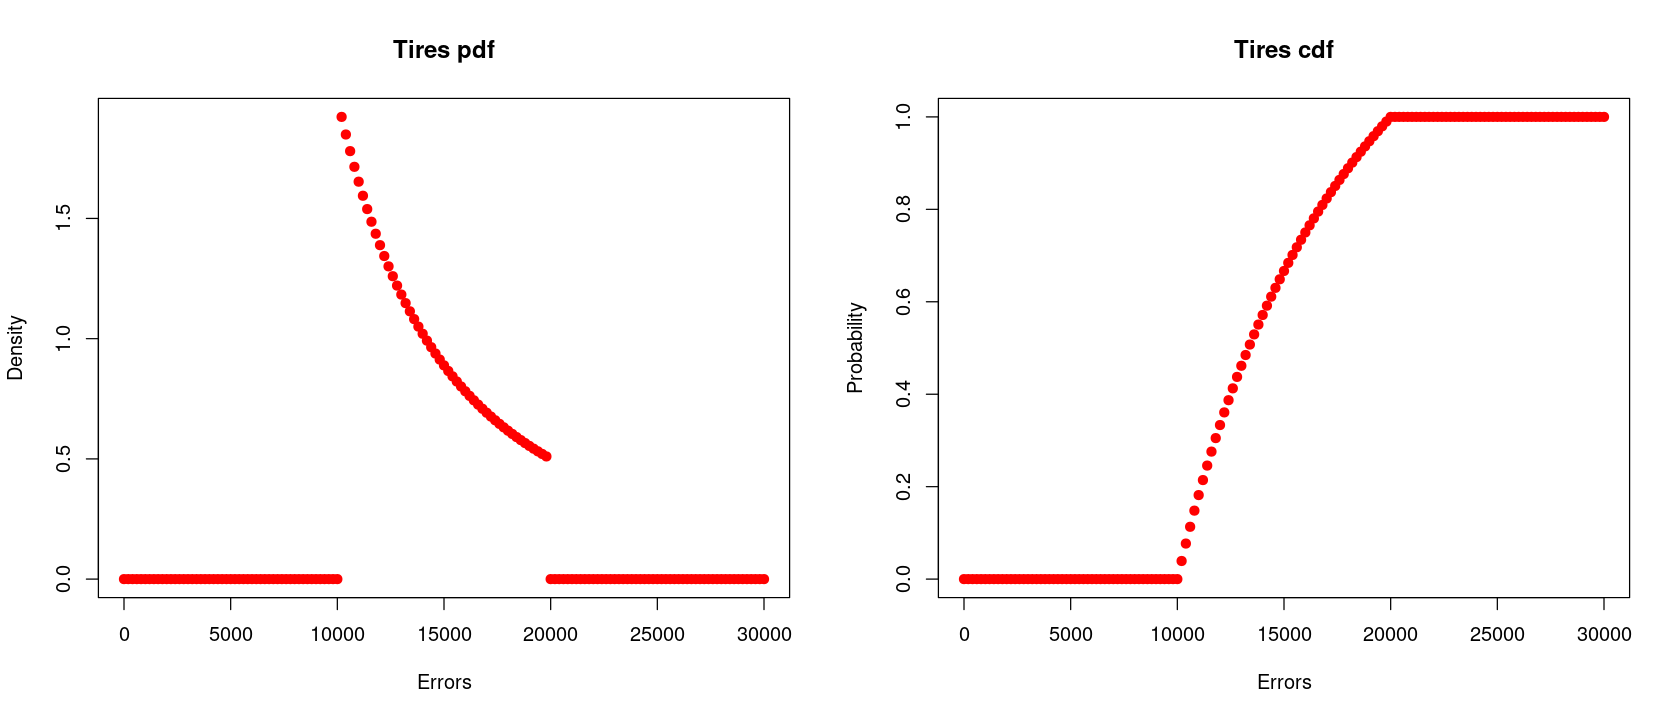

In [11]:
dtires <- Vectorize(function(x){ if (x>1 & x<2) { return(2/x^2)}
                                 else {return(0)} 
                               })

ptires <- Vectorize(function(x){ if (x>1 & x<2) {return(integrate(dtires,1,x)$value)}
                                 else if (x<=1)  {return(0)}
                                 else           {return(1)}
                               })

qtires <- Vectorize(function(p){ inverse(ptires,1,2)(p)})

rtires <- function(n){p_vec <- runif(n)
                      x_vec <- qtires(p_vec)
                      return(x_vec)}

x <- seq(0,3,0.02) 
par(mfrow = c(1,2))
options(repr.plot.width=14, repr.plot.height=6)
plot(x*10000,dtires(x), main='Tires pdf', xlab='Errors', ylab='Density',col='red',pch=19) #+ lines(x,dtires(x))
plot(x*10000,ptires(x), main='Tires cdf', xlab='Errors', ylab='Probability',col='red',pch=19)

#### 6.b)

In [12]:
cat('The probability that tires will last less than 15000km:', ptires(1.5))

The probability that tires will last less than 15000km: 0.6666667

#### 6.c)

In [13]:
samples <- rtires(3000)
cat('Samples\' mean:\t\t',mean(samples))
cat('\nSamples\' variance:\t', mean(samples^2) - mean(samples)^2)

Samples' mean:		 1.380977
Samples' variance:	 0.07591819